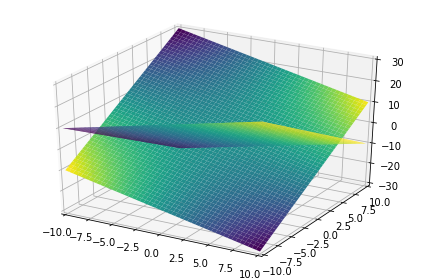

In [1]:
from sympy import *

# 题：已知两个在三维空间中的平面 x-2y+z=0 和-x+2y+z=0，试画出此两平面的立体图形并显示它们的交线。
# 解：ezmesh('-x+2*y'),hold on,ezmesh('-x-2*y')  <<<<这里答案有误，应该是ezmesh('x-2*y')

# 下面是python的绘制方法，本题有一定的拓展，使用了两种方法，并比较了各自的优劣。


from sympy.plotting import plot3d
# 这里直接用plot3d方法绘制平面图
x,y = symbols('x y')
a,b,c = symbols('a b c')

p1 = plot3d(-x+2*y, (x,-10,10),(y,-10,10), show=False)
p2 = plot3d(x-2*y, (x,-10,10),(y,-10,10) , show=False)
p1.append(p2[0])
# To add the second plot’s first series object to the first, use the ‘append’ method.
# 或者用：  p1.extend(p2)

p1[0].surface_color = lambda a, b: a*b
# surface_color : function which returns a float. 表面颜色需要输入一个函数，反映了颜色渐变的方式。
p1[1].surface_color = lambda a, b: a

p1.show()

# 以上是sympy模块内的绘图，操作起来简洁方便，但缺陷是无法很好呈现呈现出两个图形相交的样子。并且3d空间的交线因为是一条z为0的线，因方法限制很难绘制到3d空间上去。
# 此外sympy绘曲面图的上色也比较别扭。
# 既然题目还要求显示它们的交线，我们试着使用 matplotlib 绘制图形

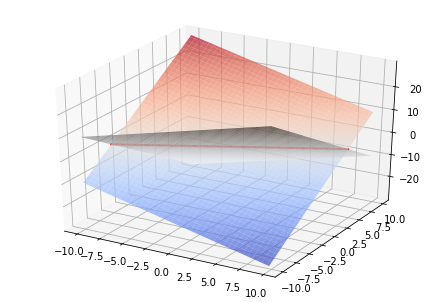

In [2]:
# 我们试着使用 matplotlib 绘制图形，并把两个平面的交线画出来。

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure()
ax = Axes3D(fig1)

X1 = np.arange(-10,10,0.25)
Y1 = np.arange(-10,10,0.25)
X1,Y1 = np.meshgrid(X1,Y1)
# X,Y的区间网格化，默认生成以Y长度为行数，X长度为列数的二维矩阵，后面再求出Z的网格，以绘制到三维坐标轴上
Z1 = -X1+2*Y1

X2 = np.arange(-10,10,0.25)
Y2 = np.arange(-10,10,0.25)
X2,Y2 = np.meshgrid(X2,Y2)
Z2 = X2-2*Y1

X3 = np.arange(-10,10,0.25)
Y3 = 0.5*X3
Z3 = 0
# 绘制交线：y=0.5x，z=0。传入一维数组就行

ax.plot_surface(X2,Y2,Z2, cmap='Greys', alpha=0.6)
# 这里开始绘制曲面。上色用：cmap(colormap参考) https://matplotlib.org/2.0.2/users/colormaps.html
# 调整一下透明度，使后面绘制的交线可见。
ax.plot_surface(X1,Y1,Z1, cmap=cm.coolwarm, alpha=0.7)

ax.plot(X3,Y3,Z3, color='r',linewidth=2)
# 绘制交线，红色

plt.show()

# 这是 matplotlib 的绘制效果，操作起来比较复杂，但可以完成。
# matplotlib也有缺陷，两个平面相交的样子不能很好地呈现出来，下面这个例子能直观地看出来。

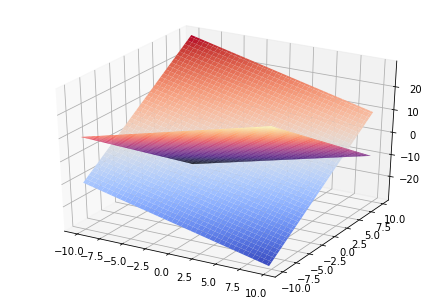

In [3]:
fig2 = plt.figure()
ax = Axes3D(fig2)

ax.plot_surface(X2,Y2,Z2, cmap='magma')
ax.plot_surface(X1,Y1,Z1, cmap=cm.coolwarm)
plt.show()

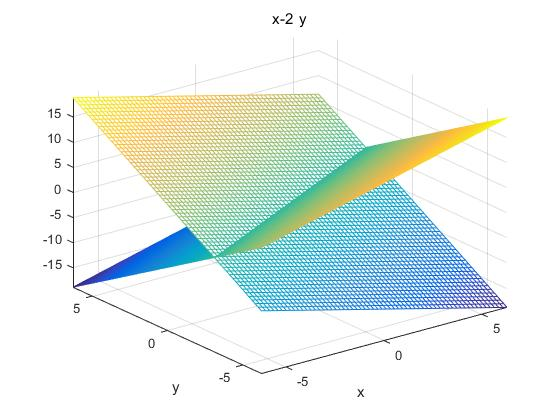

In [5]:
# malab效果预览：
from PIL import Image
display(Image.open('4.5-matlab.jpg'))

# 综上所述，画图方面matlab有快捷方便的优势，三句代码（ezmesh('-x+2*y'),hold on,ezmesh('x-2*y')）搞定。
# 并且平面相交的情况显示得非常清楚。
# 后面4.7题因涉及三维平面不作更多解答。